<a href="https://colab.research.google.com/github/gcsequino/435-TermProject/blob/main/TermProj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

345 Term Project - Greyson Sequino
***
**Dry Bean Classification**

This notebook will use the UCI Dry Bean Dataset to compare and contrast different classification algorithms

Requred Libraries

In [30]:
import numpy as np
import pandas as pd
from scipy.io.arff import loadarff
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


Retrieve Data

In [25]:
raw_data = loadarff('/content/Dry_Bean_Dataset.arff')
data = pd.DataFrame(raw_data[0])
data

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395.0,610.291,208.178117,173.888747,1.197191,0.549812,28715.0,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,b'SEKER'
1,28734.0,638.018,200.524796,182.734419,1.097356,0.411785,29172.0,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,b'SEKER'
2,29380.0,624.110,212.826130,175.931143,1.209713,0.562727,29690.0,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,b'SEKER'
3,30008.0,645.884,210.557999,182.516516,1.153638,0.498616,30724.0,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,b'SEKER'
4,30140.0,620.134,201.847882,190.279279,1.060798,0.333680,30417.0,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,b'SEKER'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097.0,759.696,288.721612,185.944705,1.552728,0.765002,42508.0,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,b'DERMASON'
13607,42101.0,757.499,281.576392,190.713136,1.476439,0.735702,42494.0,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,b'DERMASON'
13608,42139.0,759.321,281.539928,191.187979,1.472582,0.734065,42569.0,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,b'DERMASON'
13609,42147.0,763.779,283.382636,190.275731,1.489326,0.741055,42667.0,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,b'DERMASON'


Data Analysis

In [27]:
data['Class'].unique()

array([b'SEKER', b'BARBUNYA', b'BOMBAY', b'CALI', b'HOROZ', b'SIRA',
       b'DERMASON'], dtype=object)

There are 7 classes in the dataset

b'DERMASON'    3546
b'SIRA'        2636
b'SEKER'       2027
b'HOROZ'       1928
b'CALI'        1630
b'BARBUNYA'    1322
b'BOMBAY'       522
Name: Class, dtype: int64


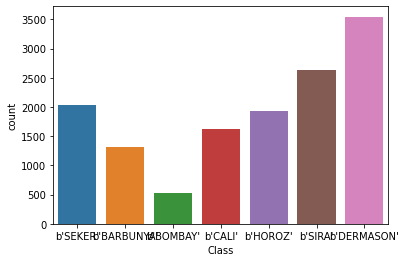

In [35]:
print(data['Class'].value_counts())
sns.countplot(x='Class', data=data)

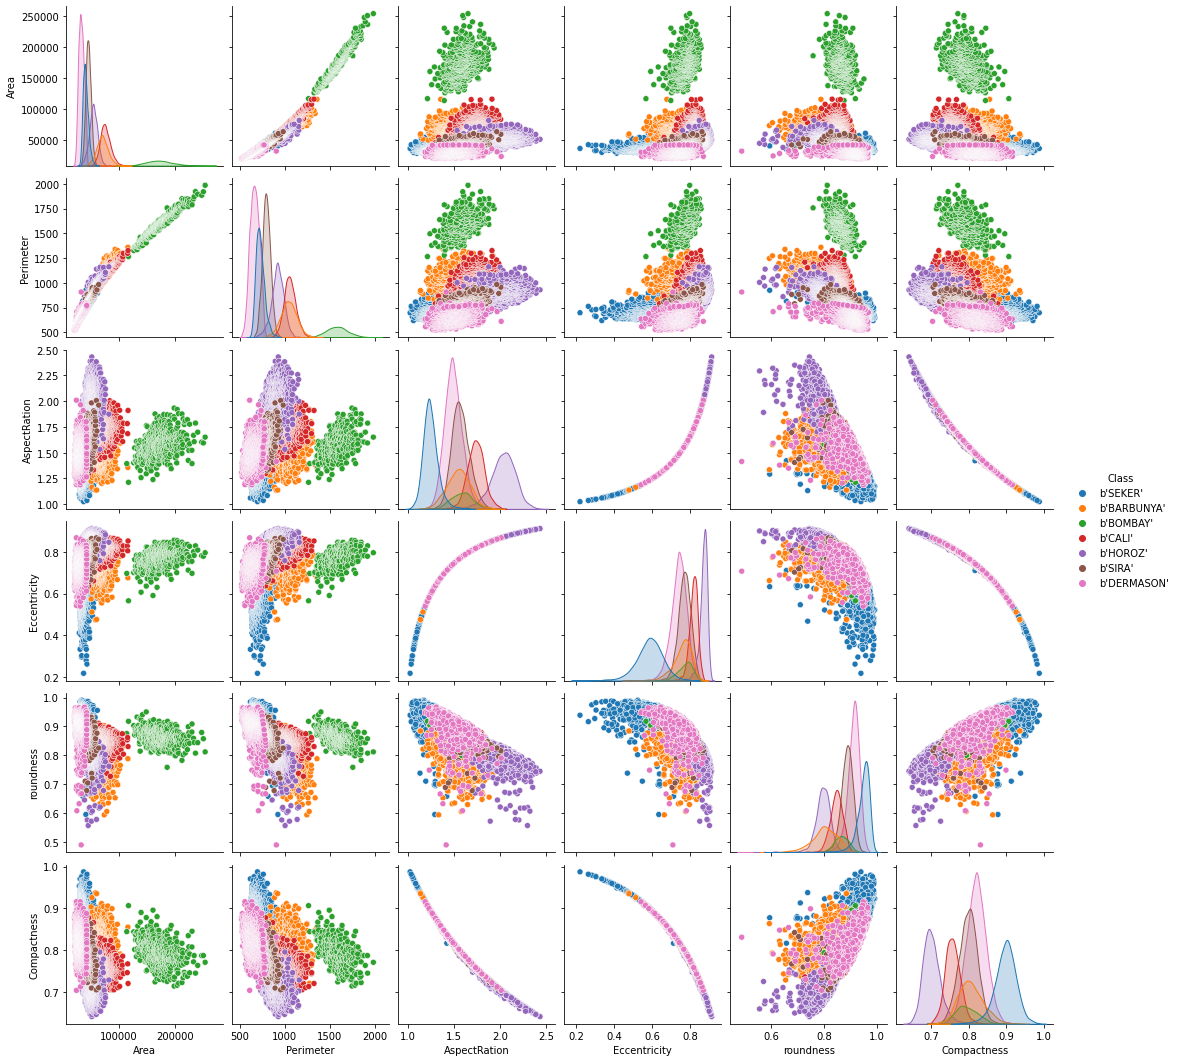

In [21]:
data6 = data[["Area","Perimeter","AspectRation","Eccentricity","roundness","Compactness","Class"]]
sns.pairplot(data6, hue='Class')

Train / Test split

In [31]:
X = data.drop("Class", axis=1)
y = data[["Class"]]

X_train, X_test, y_train, y_test = train_test_split(
      X, y, test_size = 0.2, train_size=0.8, random_state=0
    )
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)